In [16]:
class Node:
    def __init__(self, key, priority, left=None, right=None):
        self.key = key
        self.priority = priority
        self.left = left
        self.right = right
    
    def __str__(self):
        return f'Node({self.key}, {self.priority})'
    
    def copy(self):
        return Node(self.key, self.priority, self.left, self.right)

In [17]:
testnodes = "(A : 5),(B : 3),(C : 8),(D : 2),(E : 6),(F : 7),(G : 9),(H : 1),(I : 10),(J : 12)"

In [18]:
def nodes_from_string(nodes_str):
    nodes = []
    for node_str in nodes_str.split(','):
        key, priority = node_str.strip('()').split(' : ')
        nodes.append(Node(key, int(priority)))
    return nodes

def print_nodes(nodes):
    for node in nodes:
        print(node)
        

import binarytree

In [19]:
nodes = nodes_from_string(testnodes)
print_nodes(nodes)

Node(A, 5)
Node(B, 3)
Node(C, 8)
Node(D, 2)
Node(E, 6)
Node(F, 7)
Node(G, 9)
Node(H, 1)
Node(I, 10)
Node(J, 12)


In [20]:
nodes

In [21]:
def copy_nodeslist(nodes):
    return [node.copy() for node in nodes]

In [22]:
nodes[4].key, nodes[4].priority

('E', 6)

In [23]:
def insert_node_without_rotation(root, node, verbose=False):
    if verbose:
        print(f"--ADDING {node.key} TO {root.key}--")
    if node.priority < root.priority:
        if node.key < root.key:
            node.right = root
            if verbose:
                print(f"Added node above root ({node.key}.right = {root.key})")
            return node
        else:
            node.left = root
            if verbose:
                print(f"Added node above root ({node.key}.left = {root.key})")
            return node
    if node.key < root.key:
        if root.left is None:
            root.left = node
            if verbose:
                print(f"Added node to left of root ({root.key}.left = {node.key})")
            return root
        if verbose:
            print(f"\tGoing one layer down on the left from {root.key} for {node.key}")
        root.left = insert_node_without_rotation(root.left, node, verbose=verbose)
        return root
    if root.right is None:
        root.right = node
        if verbose:
            print(f"Added node to right of root ({root.key}.right = {node.key})")
        return root
    if verbose:
        print(f"\tGoing one layer down on the right from {root.key} for {node.key}")
    root.right = insert_node_without_rotation(root.right, node, verbose=verbose)
    return root

def create_tree_without_rotation(nodes, verbose=False):
    root = nodes[0]
    for node in nodes[1:]:
        root = insert_node_without_rotation(root, node, verbose=verbose)
    return root

def convert_to_printable(root):
    if root is None:
        return None
    return binarytree.Node('(' + root.key + ', ' + str(root.priority) + ')', convert_to_printable(root.left), convert_to_printable(root.right))

In [24]:
def insert_node(root, node, verbose=False):
    if verbose:
        print(f"--ADDING {node.key} TO {root.key}--")
    if node.priority < root.priority:
        if node.key < root.key:
            node.right = root
            if verbose:
                print(f"Added node above root ({node.key}.right = {root.key})")
            if root.left and root.left.key < node.key:
                node.left = root.left
                root.left = None
                if verbose:
                    print("Fixed left child")
            return node
        else:
            node.left = root
            if verbose:
                print(f"Added node above root ({node.key}.left = {root.key})")
            if root.right and root.right.key > node.key:
                node.right = root.right
                root.right = None
                if verbose:
                    print("Fixed right child")
            return node
    if node.key < root.key:
        if root.left is None:
            root.left = node
            if verbose:
                print(f"Added node to left of root ({root.key}.left = {node.key})")
            return root
        if verbose:
            print(f"\tGoing one layer down on the left from {root.key} for {node.key}")
        root.left = insert_node(root.left, node, verbose=verbose)
        return root
    if root.right is None:
        root.right = node
        if verbose:
            print(f"Added node to right of root ({root.key}.right = {node.key})")
        return root
    if verbose:
        print(f"\tGoing one layer down on the right from {root.key} for {node.key}")
    root.right = insert_node(root.right, node, verbose=verbose)
    return root

def create_tree(nodes, verbose=False):
    root = nodes[0]
    for node in nodes[1:]:
        root = insert_node(root, node, verbose=verbose)
    return root

def convert_to_printable(root):
    if root is None:
        return None
    return binarytree.Node('(' + root.key + ', ' + str(root.priority) + ')', convert_to_printable(root.left), convert_to_printable(root.right))

In [25]:
nodes = nodes_from_string(testnodes)
#print_nodes(nodes)
root = create_tree_without_rotation(nodes)

print(convert_to_printable(root))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [26]:
# new order:   H,      D,      B,      A,      E,      F,      C,      G,      I et     J
testnodes2 = "(H : 1),(D : 2),(B : 3),(A : 5),(E : 6),(F : 7),(C : 8),(G : 9),(I : 10),(J : 12)"
nodes2 = nodes_from_string(testnodes2)

In [27]:
nodes2 = nodes_from_string(testnodes2)
#print_nodes(nodes)
root2 = create_tree_without_rotation(nodes2)

print(convert_to_printable(root2))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [28]:
root3 = insert_node_without_rotation(root2, Node('M', 20))
print(convert_to_printable(root3))
root3 = insert_node_without_rotation(root3, Node('K', 15))
print(convert_to_printable(root3))
root3 = insert_node_without_rotation(root3, Node('L', 14))
print(convert_to_printable(root3))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)___
   /           \                    \                                     \
(A, 5)        (C, 8)               (F, 7)__                             (M, 20)
                                           \
                                          (G, 9)


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)___
   /           \                    \                                     \
(A, 5)       

In [29]:
root3 = insert_node(root2, Node('M', 20))
print(convert_to_printable(root3))
root3 = insert_node(root3, Node('K', 15))
print(convert_to_printable(root3))
root3 = insert_node(root3, Node('L', 14))
print(convert_to_printable(root3))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)___________________
   /           \                    \                                                     \
(A, 5)        (C, 8)               (F, 7)__                                  ___________(L, 14)___
                                           \                                /                     \
                                          (G, 9)                        (K, 15)___              (M, 20)
                                                                                  \
                                                                                (M, 20)


                         ________________________(H, 1)___
                        / 

In [30]:
nodes = nodes_from_string(testnodes)
root = nodes[0]
print(root, nodes[1])

Node(A, 5) Node(B, 3)


In [31]:
root = insert_node(root, nodes[1])
print(convert_to_printable(root))


    ___(B, 3)
   /
(A, 5)



In [32]:
root = insert_node(root, nodes[2])
print(convert_to_printable(root))


    ___(B, 3)__
   /           \
(A, 5)        (C, 8)



In [33]:
root = insert_node(root, nodes[3])
print(convert_to_printable(root))


           __________(D, 2)
          /
    ___(B, 3)__
   /           \
(A, 5)        (C, 8)



In [34]:
root = insert_node(root, nodes[4])
print(convert_to_printable(root))


           __________(D, 2)__
          /                  \
    ___(B, 3)__             (E, 6)
   /           \
(A, 5)        (C, 8)



In [35]:
root = insert_node(root, nodes[5])
print(convert_to_printable(root))


           __________(D, 2)__
          /                  \
    ___(B, 3)__             (E, 6)__
   /           \                    \
(A, 5)        (C, 8)               (F, 7)



In [36]:
root = insert_node(root, nodes[6])
print(convert_to_printable(root))


           __________(D, 2)__
          /                  \
    ___(B, 3)__             (E, 6)__
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [37]:
root = insert_node(root, nodes[7])
print(convert_to_printable(root))


                         ________________________(H, 1)
                        /
           __________(D, 2)__
          /                  \
    ___(B, 3)__             (E, 6)__
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [38]:
root = insert_node(root, nodes[8])
print(convert_to_printable(root))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)
          /                  \
    ___(B, 3)__             (E, 6)__
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [39]:
root = insert_node(root, nodes[9])
print(convert_to_printable(root))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [40]:
nodes = nodes_from_string(testnodes)
print_nodes(nodes)
root = create_tree(nodes)

Node(A, 5)
Node(B, 3)
Node(C, 8)
Node(D, 2)
Node(E, 6)
Node(F, 7)
Node(G, 9)
Node(H, 1)
Node(I, 10)
Node(J, 12)


In [41]:
print(convert_to_printable(root))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [42]:
# new order:   H,      D,      B,      A,      E,      F,      C,      G,      I et     J
testnodes2 = "(H : 1),(D : 2),(B : 3),(A : 5),(E : 6),(F : 7),(C : 8),(G : 9),(I : 10),(J : 12)"
nodes2 = nodes_from_string(testnodes2)

In [43]:
root2 = create_tree(nodes2)
print(convert_to_printable(root2))


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)



In [44]:
def find_node(root, key):
    if root is None:
        return None
    if root.key == key:
        return root
    if key < root.key:
        return find_node(root.left, key)
    return find_node(root.right, key)

In [45]:
search = "E"
found_node = find_node(root2, search)
print(found_node, "==", search, found_node.key == search)   

Node(E, 6) == E True


In [46]:
examplenodes = "(F : 1),(H : 2),(B : 3),(A : 10),(E : 6),(C : 7),(J : 8),(G : 9),(I : 5),(D : 4)"
nodes3 = nodes_from_string(examplenodes)
root3 = create_tree(nodes3)
print(convert_to_printable(root3))


            ________________________(F, 1)_________
           /                                       \
     ___(B, 3)_________                        ___(H, 2)__
    /                  \                      /           \
(A, 10)            ___(D, 4)__             (G, 9)        (I, 5)__
                  /           \                                  \
               (C, 7)        (E, 6)                             (J, 8)



In [47]:
examplenodes = "(F : 1),(H : 2),(B : 3),(A : 10),(E : 6),(C : 7),(J : 8),(G : 9),(I : 5),(D : 4)"
nodes3 = nodes_from_string(examplenodes)

root3 = nodes3[0]

for i in range(1, len(nodes3)):
    root3 = insert_node(root3, nodes3[i])
    print(convert_to_printable(root3))


(F, 1)__
        \
       (H, 2)


    ___(F, 1)__
   /           \
(B, 3)        (H, 2)


            ___(F, 1)__
           /           \
     ___(B, 3)        (H, 2)
    /
(A, 10)


            __________(F, 1)__
           /                  \
     ___(B, 3)__             (H, 2)
    /           \
(A, 10)        (E, 6)


            _________________(F, 1)__
           /                         \
     ___(B, 3)_________             (H, 2)
    /                  \
(A, 10)            ___(E, 6)
                  /
               (C, 7)


            _________________(F, 1)__
           /                         \
     ___(B, 3)_________             (H, 2)__
    /                  \                    \
(A, 10)            ___(E, 6)               (J, 8)
                  /
               (C, 7)


            _________________(F, 1)_________
           /                                \
     ___(B, 3)_________                 ___(H, 2)__
    /                  \               /          

## Q 3.a Montrer, sur l’exemple de la question 1.a. que l’insertion d’un nœud dans un arbre cartésien en suivant la m´ethode d’insertion dans un arbre binaire de recherche, peut r´esulter en un arbre qui ne v´erifie plus la propri´et´e de tas

# A: insert_tree before the left and right child fixes

In [48]:
def rotate_tree_right(root):
    new_root = root.left
    root.left = new_root.right
    new_root.right = root
    return new_root

def rotate_tree_left(root):
    new_root = root.right
    root.right = new_root.left
    new_root.left = root
    return new_root

In [49]:
print(convert_to_printable(rotate_tree_right(root3)))


     ___(B, 3)_______________________
    /                                \
(A, 10)                   __________(F, 1)_________
                         /                         \
                   ___(D, 4)__                 ___(H, 2)__
                  /           \               /           \
               (C, 7)        (E, 6)        (G, 9)        (I, 5)__
                                                                 \
                                                                (J, 8)



# Complexity of rotation is O(1)  ?

---

# 3.D TESTS

---

In [50]:
nodes3d1 = nodes_from_string("(A : 5),(B : 3),(C : 8),(D : 2),(E : 6),(F : 7),(G : 9),(H : 1),(I : 10),(J : 12)")
nodes3d2 = nodes_from_string("(H : 1),(G : 9),(A : 5),(B : 3),(D : 2),(F : 7),(C : 8),(J : 12),(I : 10),(E : 6)")
nodes3d3 = nodes_from_string("(E : 6),(H : 1),(B : 3),(D : 2),(C : 8),(F : 7),(G : 9),(J : 12),(A : 5),(I : 10)")

print("\tTEST 1 (QUESTION 1.A)")
root1 = create_tree(nodes3d1, verbose=False)
print(convert_to_printable(root1))

print("\tTEST 2")
print(convert_to_printable(create_tree(nodes3d2, verbose=False)))

print("\tTEST 3")
print(convert_to_printable(create_tree(nodes3d3, verbose=False)))

	TEST 1 (QUESTION 1.A)

                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)

	TEST 2

                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
           

---

# EX 4

---

In [51]:
def remove_node(root, node):
    if root is None:
        return None
    if root.key == node.key:
        if root.left is None:
            return root.right
        if root.right is None:
            return root.left
        if root.left.priority < root.right.priority:
            return rotate_tree_right(root)
        return rotate_tree_left(root)
    if node.key < root.key:
        root.left = remove_node(root.left, node)
        return root
    root.right = remove_node(root.right, node)
    return root

def remove_key(root, key):
    return remove_node(root, find_node(root, key))

In [52]:
def remove_node(root, node):
    if root is None:
        return None
    # Search for the node to remove
    if node.key < root.key:
        root.left = remove_node(root.left, node)
        return root
    if node.key > root.key:
        root.right = remove_node(root.right, node)
        return root
    # Case 1: Node is a leaf
    if root.left is None and root.right is None:
        return None
    # Case 2: Node has one child
    elif root.left is None:
        # Case 2.1: Node has a right child
        return root.right
    elif root.right is None:
        # Case 2.2: Node has a left child
        return root.left
    # Case 3: Node has two children
    # Rotate with the child that has the lowest priority
    if root.left.priority < root.right.priority:
        root = rotate_tree_right(root)
        root.right = remove_node(root.right, node)
    else:
        root = rotate_tree_left(root)
        root.left = remove_node(root.left, node)
    
    return root

def remove_key(root, key):
    return remove_node(root, find_node(root, key))

# 4.D - TESTS

In [53]:
print("\tSTARTING TREE\n")
print(convert_to_printable(root1))

print("\tTEST 1 (remove A5)\n")
A_removed = remove_key(root1, "A")
print(convert_to_printable(A_removed))

print("\tTEST 2 (remove J12)\n")
J_removed = remove_key(root1, "J")
print(convert_to_printable(J_removed))

print("\tTEST 3 (remove H1)\n")
H_removed = remove_key(root1, "H")
print(convert_to_printable(H_removed))

	STARTING TREE


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)

	TEST 1 (remove A5)


                  ________________________(H, 1)___
                 /                                 \
    __________(D, 2)__                           (I, 10)___
   /                  \                                    \
(B, 3)__             (E, 6)__                            (J, 12)
        \                    \
       (C, 8)               (F, 7)__
                                    \
                                   (G, 9)

	TEST 2 (remove J1

---

# 5 - RANDOM TREE

---

In [54]:
import random

def get_random_node(nodeslist, priority_range=(0, 1000), max_priority_search=100):
    if nodeslist == []:
        key = random.choice("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
        priority = random.randint(*priority_range)
        return Node(key, priority)
    # alphabet excluding keys already in the list
    possible_keys = [key for key in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" if key not in [node.key for node in nodeslist]]
    if possible_keys == []:
        print("ERROR: No more keys available in alphabet")
        return
    key = random.choice(possible_keys)
    priority = priority_range[0] - 1
    while priority < priority_range[0] and priority > priority_range[0] - max_priority_search:
        p_temp = random.randint(*priority_range)
        if p_temp not in [node.priority for node in nodeslist]:
            priority = p_temp
        else:
            priority -= 1
    if priority < priority_range[0]:
        print("ERROR: No priorities found, skipping")
        return 
    return Node(key, priority)

def create_random_nodeslist(n, priority_range=(0, 1000)):
    nodeslist = []
    for _ in range(n):
        nodeslist.append(get_random_node(nodeslist, priority_range=priority_range))
    return nodeslist

In [55]:
random_nodes = create_random_nodeslist(10, priority_range=(1, 100))
for node in random_nodes:
    print(node)
len(random_nodes)

root_random = create_tree(random_nodes)
print(convert_to_printable(root_random))

Node(Y, 48)
Node(D, 38)
Node(G, 23)
Node(R, 76)
Node(J, 93)
Node(K, 64)
Node(N, 31)
Node(Q, 14)
Node(W, 87)
Node(M, 97)

             ___________________________________________________(Q, 14)___
            /                                                             \
     ___(G, 23)___________________________________                      (W, 87)
    /                                             \
(D, 38)                      ___________________(N, 31)___
                            /                             \
                     ___(K, 64)___________              (Y, 48)
                    /                     \
                (J, 93)              ___(R, 76)
                                    /
                                (M, 97)



In [56]:
len("ABCDEFGHIJKLMNOPQRSTUVWXYZ")

26

In [57]:
import time
import numpy as np
import matplotlib.pyplot as plt

def test_tree_insertion(n, priority_range=(0, 1000)):
    nodes = create_random_nodeslist(n, priority_range=priority_range)
    root = create_tree(nodes)
    start = time.time()
    insert_node(root, get_random_node(nodes, priority_range=priority_range))
    end = time.time()
    return end - start

def insertion_complexity(priority_range=(0, 1000), repetitions=100):
    times = np.zeros(26)
    for n in range(1, 26):
        for _ in range(repetitions):
            times[n] += test_tree_insertion(n, priority_range=priority_range)
        times[n] /= repetitions
    return times

repetitions = 10
times = insertion_complexity(priority_range=(0, 1000), repetitions=repetitions)

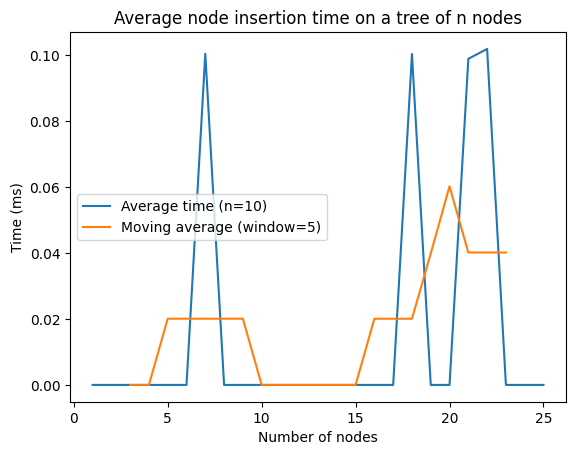

In [58]:
plt.title("Average node insertion time on a tree of n nodes")
plt.plot(range(1, 26), times[1:] * 1000, label=f"Average time (n={repetitions})")
# plot a moving average regression, with a window of x
window = 5
convolved_times = np.convolve(times[1:] * 1000, np.ones(window)/window, mode='valid')
plt.plot(range(window//2 + 1, 26 - window//2), convolved_times, label=f"Moving average (window={window})")
plt.xlabel("Number of nodes")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

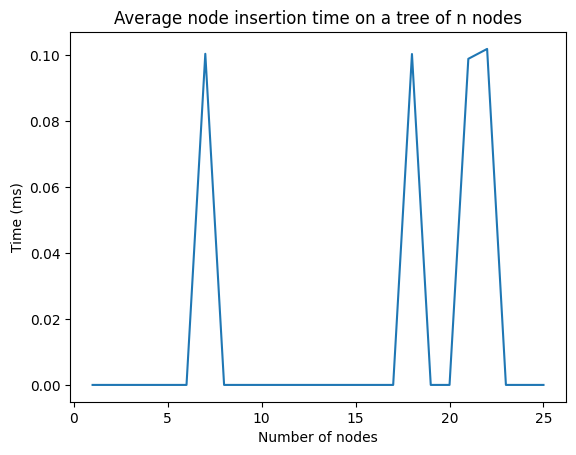

In [59]:
plt.title("Average node insertion time on a tree of n nodes")
plt.plot(range(1, 26), times[1:] * 1000)
# plot linear complexity line for complexity reference
# going from (0, 0) to (max(times), 25)
# plt.plot([0, 25], [0, max(times)*1000], 'r--')
plt.xlabel("Number of nodes")
plt.ylabel("Time (ms)")
plt.show()

---

In [60]:
def get_random_node_3key(nodeslist, priority_range=(0, 10000), max_priority_search=100):
    alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    if nodeslist == []:
        key = random.choice(alphabet) + random.choice(alphabet) + random.choice(alphabet)
        priority = random.randint(*priority_range)
        return Node(key, priority)
    
    key = random.choice(alphabet) + random.choice(alphabet) + random.choice(alphabet)
    while key in [node.key for node in nodeslist]:
        key = random.choice(alphabet) + random.choice(alphabet) + random.choice(alphabet)
    
    priority = priority_range[0] - 1
    while priority < priority_range[0] and priority > priority_range[0] - max_priority_search:
        p_temp = random.randint(*priority_range)
        if p_temp not in [node.priority for node in nodeslist]:
            priority = p_temp
        else:
            priority -= 1
            
    if priority < priority_range[0]:
        print("ERROR: No priorities found, skipping")
        return 
    
    
    return Node(key, priority)

def create_random_nodeslist_3key(n, priority_range=(0, 10000), max_priority_search=100):
    nodeslist = []
    for _ in range(n):
        nodeslist.append(get_random_node_3key(nodeslist, priority_range=priority_range, max_priority_search=max_priority_search))
    return nodeslist

In [61]:
random_nodes = create_random_nodeslist_3key(10, priority_range=(1, 100))
for node in random_nodes:
    print(node)
len(random_nodes)

root_random = create_tree(random_nodes)
print(convert_to_printable(root_random))

Node(AYX, 86)
Node(LVR, 12)
Node(PXG, 5)
Node(EUO, 59)
Node(DTS, 43)
Node(QRH, 24)
Node(VZG, 100)
Node(PMC, 17)
Node(FJO, 53)
Node(FNB, 56)

                                                        ______________(PXG, 5)____
                                                       /                          \
                __________________________________(LVR, 12)____                (QRH, 24)____
               /                                               \                            \
      ____(DTS, 43)______________                           (PMC, 17)                    (VZG, 100)
     /                           \
(AYX, 86)                 ____(FJO, 53)____
                         /                 \
                    (EUO, 59)           (FNB, 56)



In [62]:
def test_tree_insertion_3key(n, priority_range=(0, 1000)):
    nodes = create_random_nodeslist_3key(n, priority_range=priority_range)
    root = create_tree(nodes)
    start = time.time()
    insert_node(root, get_random_node_3key(nodes, priority_range=priority_range))
    end = time.time()
    return end - start

def insertion_complexity_3key(max_n, priority_range=(0, 1000), repetitions=100):
    times = np.zeros(max_n)
    for n in range(1, max_n):
        for _ in range(repetitions):
            times[n] += test_tree_insertion_3key(n, priority_range=priority_range)
        times[n] /= repetitions
    return times

max_n = 10
repetitions = 5
times = insertion_complexity_3key(max_n, priority_range=(0, 1000), repetitions=repetitions)

In [63]:
times

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

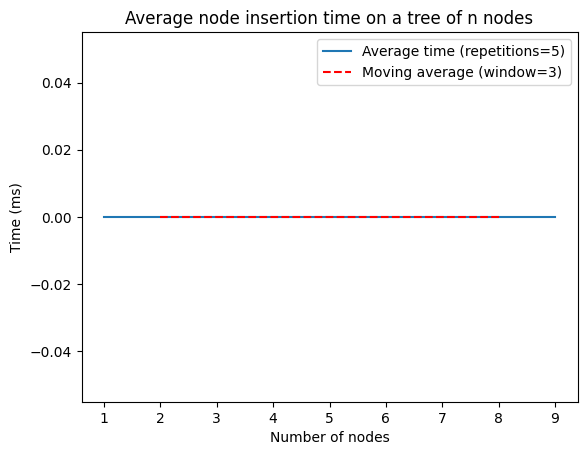

In [64]:
plt.title("Average node insertion time on a tree of n nodes")
plt.plot(range(1, len(times)), times[1:] * 1000, label=f"Average time (repetitions={repetitions})")
# plot a moving average with window = window
window = 3
convolved_times = np.convolve(times[1:] * 1000, np.ones(window)/window, mode='valid')
plt.plot(range(window//2 + 1, len(times) - window//2), convolved_times, label=f"Moving average (window={window})", color='red', linestyle='dashed')
plt.xlabel("Number of nodes")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

In [88]:

def get_depth(root):
    if root is None:
        return 0
    return 1 + max(get_depth(root.left), get_depth(root.right))

def get_depth_of_node(root, node):
    if root is None:
        return 0
    if root.key == node.key:
        return 1
    if node.key < root.key:
        return 1 + get_depth_of_node(root.left, node)
    return 1 + get_depth_of_node(root.right, node)

In [89]:
print(convert_to_printable(root))
print(f"Depth of tree: {get_depth(root)}")
nodekey = "I"
print(f"Depth of node {nodekey}: {get_depth_of_node(root, find_node(root, nodekey))}")


                         ________________________(H, 1)___
                        /                                 \
           __________(D, 2)__                           (I, 10)___
          /                  \                                    \
    ___(B, 3)__             (E, 6)__                            (J, 12)
   /           \                    \
(A, 5)        (C, 8)               (F, 7)__
                                           \
                                          (G, 9)

Depth of tree: 5
Depth of node I: 2


In [126]:
def insertion_complexity_by_depth_3key(node_count, test_count, repetition_count, priority_range=(0, 1000), max_priority_search=100):
    times = [[] for _ in range(node_count)]
    for _ in range(test_count):
        nodes = create_random_nodeslist_3key(node_count, priority_range=priority_range, max_priority_search=max_priority_search)
        for repetition in range(repetition_count):
            copynodes = copy_nodeslist(nodes)
            root = create_tree(copynodes)
            random_insert = get_random_node_3key(copynodes, priority_range=priority_range, max_priority_search=max_priority_search)
            start = time.time()
            insert_node(root, random_insert)
            end = time.time()
            depth = get_depth_of_node(root, random_insert)
            times[depth - 1].append((end - start) * 1000)
    print("Recorded insert depths:", [len(times[i]) for i in range(len(times))])
    times = [np.mean(time) for time in times]
    return times

In [127]:
node_count = 30
test_count = 1000
repetition_count = 30

priority_range = (0, 1000)
max_priority_search = 100

times = insertion_complexity_by_depth_3key(node_count, test_count, repetition_count, priority_range=priority_range, max_priority_search=max_priority_search)


Recorded insert depths: [485, 2341, 4149, 5518, 5344, 4621, 3431, 2003, 1090, 613, 260, 89, 45, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\EGE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\EGE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [129]:
print(times)

[0.0, 0.00047194860980633946, 0.00024117685622782785, 0.0007333164415570349, 0.00020076414782130075, 0.000657005450395866, 0.0008718156494923355, 0.0005240923633470692, 0.0, 0.0032585168934957435, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


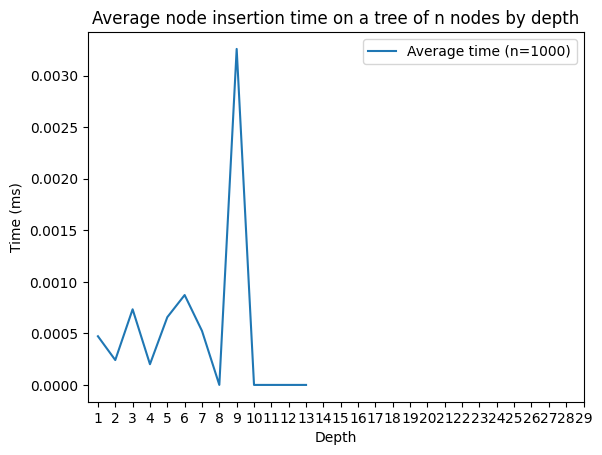

In [130]:
plt.title("Average node insertion time on a tree of n nodes by depth")
plt.plot(range(1, len(times)), times[1:], label=f"Average time (n={test_count})")
plt.xlabel("Depth")
plt.ylabel("Time (ms)")
plt.xticks(range(1, len(times)))
plt.legend()
plt.show()